<a href="https://colab.research.google.com/github/brian-ho/mde-preterm-2024/blob/main/day_1/notebooks/View_and_analyze_data_on_a_basic_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSV to data and a map: basic tabular and geospatial analysis  

```
2024 MDE Preterm
Brian Ho - brian@brian-ho.io
Jenny Fan - me@jennyfan.com
```

A short notebook that demonstrates very basic usage of [Pandas](https://pandas.pydata.org) and [GeoPandas](https://geopandas.org/en/stable/) for working with tabular and geospatial analysis. 

- Loading a CSV file
- The `date` the image was taken
- The top 10 most common `colors` in each image, as an array hex values
- The `colors_count` is an array with the number of pixels for each color
- The `image_width` in pixels
- The `image_height` in pixels


In [1]:
# Let's import our dependencies.
import pandas as pd
import geopandas as gpd
import geodatasets
from shapely.geometry import Point

In [ ]:
# When running on Colab, we can connect to a Google Drive folder
from google.colab import drive

drive.mount("/content/drive")

In [4]:
# Update the path as needed to point to a CSV
df = pd.read_csv("../p5/end_to_end_demo/data/data.csv")

# You can quickly see basic statistical summaries!
df.describe()

,image_width,image_height,latitude,longitude,altitude
count,113.000000,113.000000,113.000000,113.000000,113.000000
mean,2752.026549,3327.769912,32.831646,-21.865286,173.510379
std,374.181021,564.775287,17.307137,95.242388,451.808559
min,1536.000000,2048.000000,-37.864372,-158.046556,-44.091615
25%,2448.000000,3264.000000,25.114339,-74.002144,11.369661
50%,2448.000000,3264.000000,40.692633,-71.118636,25.376038
75%,3024.000000,4032.000000,42.352447,108.325972,75.383436
max,4032.000000,4032.000000,61.213497,151.214736,2457.334101


In [6]:
# Or view the table directly. head() returns the first 5 rows.
df.head()

,image_name,image_width,image_height,latitude,longitude,altitude,date,color_count,red,green,...,color_0,color_1,color_2,color_3,color_4,color_5,color_6,color_7,color_8,color_9
0,image_013.jpeg,3264,2448,42.362125,-71.091561,39.476103,2016-10-08 12:49:11,"[1096, 783, 754, 489, 414, 3, 2, 2, 2, 2, 1]","[204, 102, 204, 51, 204, 51, 204, 255, 153, 20...","[204, 51, 204, 51, 255, 102, 102, 204, 102, 15...",...,#ccccff,#663333,#cccccc,#333333,#336600,#cc6699,#ffcc99,#9966cc,#cc99ff,#99ffcc
1,image_027.jpeg,3264,2448,40.708633,-73.991639,1.754059,2014-12-23 11:35:32,"[1006, 858, 734, 512, 494, 54, 54, 53, 52, 2, 1]","[153, 255, 102, 204, 51, 0, 204, 153, 51, 153,...","[153, 255, 102, 204, 51, 51, 153, 153, 51, 102...",...,#999999,#ffffff,#666666,#cccccc,#003300,#cc99cc,#9999cc,#333300,#996633,#cc9966
2,image_029.jpeg,2448,3264,25.120383,121.506578,27.146974,2014-12-31 17:26:14,"[810, 643, 608, 529, 488, 4, 3, 2, 2, 1, 1]","[51, 153, 204, 0, 204, 153, 102, 153, 153, 102...","[51, 153, 153, 0, 204, 51, 153, 51, 204, 51, 204]",...,#333333,#999999,#cc9999,#000000,#993333,#6699cc,#993366,#99cc66,#663300,#66cccc
3,image_030.jpeg,2448,2448,25.098792,121.512878,6.576294,2015-01-04 10:51:42,"[2308, 1449, 587, 525, 490, 1, 1, 1, 1, 1, 1]","[102, 51, 102, 102, 153, 153, 255, 204, 153, 2...","[102, 51, 102, 51, 153, 204, 204, 102, 255, 15...",...,#666666,#333333,#666633,#663333,#99cc66,#ffcc66,#cc6699,#99ffcc,#cc99ff,#99ffff
4,image_031.jpeg,2448,3264,25.055831,121.560950,-7.174652,2015-01-11 12:36:03,"[1209, 712, 585, 495, 359, 1, 1, 1, 1, 1, 1]","[51, 102, 153, 204, 204, 0, 204, 102, 204, 153...","[51, 102, 153, 255, 204, 51, 102, 51, 102, 255...",...,#333333,#666666,#999999,#ccffff,#003366,#cc6666,#663399,#cc6699,#99ffcc,#99ccff


<Axes: >

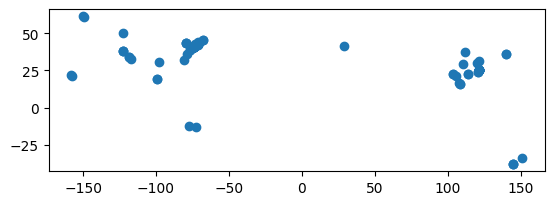

In [7]:
# A common pattern is creating new columns based on others, with an apply function
# In this case, we'll construct geometric points using GPS info
df["geometry"] = df.apply(lambda x: Point(x["longitude"], x["latitude"]), axis=1)

# We can now create a GeoDataFrame, by providing the geometry and a coordinate reference system (CRS)
gdf = gpd.GeoDataFrame(df, crs=4326)

# Plot will quickly show the data! It looks ... vaguely familiar?
gdf.plot()

<Axes: >

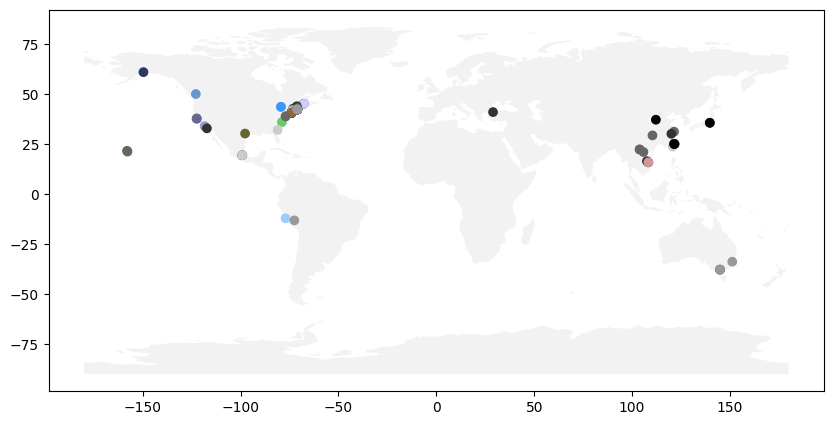

In [10]:
# You can plot additional data to help contextualize
# Here we're using available data from Natural Earth to get basic landmasses
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))

# Now, plot to the same axis
ax = world.plot(facecolor="grey", alpha=0.1, figsize=(10, 10))

# The color argument will allow us to supply color values — in this case, from the matching column!
gdf.plot(color=gdf["color_1"], ax=ax)

In [ ]:
# You can save a GeoDataFrame file to GeoJSON
world.to_file("../p5/data/world.geojson")